# Day9. 기본과제

Req-1. basic.
ipynb 파일을 생 성 한 후 Hello World 를 출력해 보세요

In [0]:
print('Hello World')


Hello World


Req-2. basic.ipynb
파일에 일주일은 몇 초 인지 표시하는 코드를 자유롭게 Colab
에 추가 후 실행해 보세요.


In [0]:
print(7*24*60*60)

604800


Req-3. basic.ipynb
파일에 Colab 의 코드 스니펫 창의 다음의 코드들을 추가 후
실행해 보세요
- Visualization: Linked Brushing in Altair
- Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요
- 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다
실행결과를
그대로 저장해 주세요

In [0]:
# Visualization: Linked Brushing in Altair

In [0]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

base.encode(x='Acceleration') | base.encode(x='Horsepower')

alt.HConcatChart(...)

In [0]:
# Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


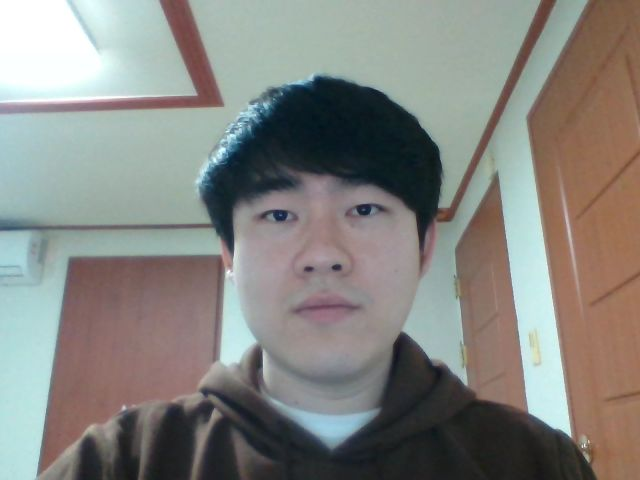

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
# 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다 실행결과를 그대로 저장해 주세요

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0    97k      0 --:--:-- --:--:-- --:--:--   97k


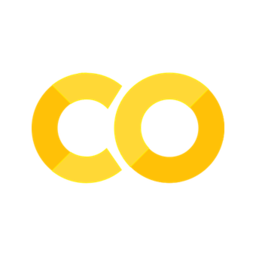

In [0]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

Req-4. basic.ipynb
파일에 Google Drive 연동을 하는 코드를 추가하고 본인의 구글
드라이브 에 임의의 텍스트파일을 저장하는 코드를 작성해보세요 코드
스니펫 의 Mounting Google Drive in your VM 을 사용해도 무방합니다

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1dqgS99jRJmqbwxDo7kwOY1mYfIkWLMhd


Req-5. 다음의 GPU가속 예제코드를 실행해 보고 CPU 사용시 처리시간과 GPU 사용시 처리시간을 비교해 보고 마지막 블럭인“Observe TensorFlow speedup on GPU relative to CPU“의 결과를 복사해서 basic.ipynb의 Req-5 다음에 텍스트 형태로 붙여 주세요.
☞ https://colab.research.google.com/notebooks/gpu.ipynb



In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.3230506459999987
GPU (s):
0.09633825299999899
GPU speedup over CPU: 34x


Req.5의 실행결과는 다음과 같습니다.

```
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.3230506459999987
GPU (s):
0.09633825299999899
GPU speedup over CPU: 34x
```

Req-6. basic.ipynb
파일에 matplotlib 와 OpenCV 의 Drawing API 를 이용하여
화면에 여러 가지 도 형을 그려주는 코드를 작성해 보세요.

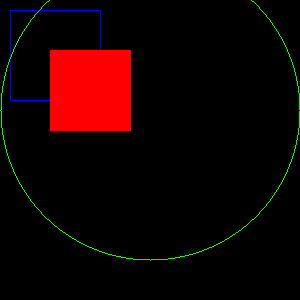

In [27]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

blue_color = (255, 0, 0)
green_color = (0, 255, 0)
red_color = (0, 0, 255)
img = np.zeros((300, 300, 3), np.uint8)

# cv2.rectangle(image, (시작점x, 시작점y), (종료점x, 종료점y), 색깔(brg), 윤곽선두께(-1이면 완전히 채움)
img = cv2.rectangle(img, (10, 10), (100, 100), blue_color)
img = cv2.circle(img, (150, 110), 150, green_color)
img = cv2.rectangle(img, (130, 130), (50, 50), red_color,-1)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


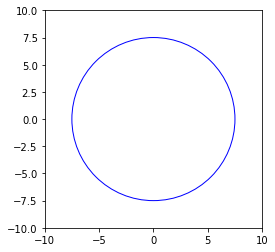

In [23]:
import matplotlib as mp

circle_center = (0, 0)
circle_radius = 7.5
c = mp.pyplot.Circle(circle_center, circle_radius, fc='w', ec='b')
a = mp.pyplot.axes(xlim=(-10, 10), ylim=(-10, 10))
a.add_patch(c)
a.set_aspect('equal')
mp.pyplot.show()